# softmax回归模型

* 交叉熵损失函数
$$
L = -\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^K y_{ij} \log(p_{ij})
$$

其中，$y_{ij}$表示第$i$个样本属于第$j$个类别的真实标签，$p_{ij}$表示第$i$个样本属于第$j$个类别的预测概率。

对于多分类问题，我们通常使用交叉熵损失函数来评估模型的性能。交叉熵损失函数可以衡量两个概率分布之间的差异，其值越小表示两个概率分布越接近。

* 最大似然估计与最小化交叉熵损失函数

最大似然估计是一种参数估计方法，其目标是找到一组参数，使得观测数据在该参数下的概率（似然）最大。

交叉熵损失函数用于衡量模型预测的概率分布与真实标签的概率分布之间的差异。最小化交叉熵损失函数等价于最大化似然函数，从而找到最优的模型参数。

最大似然估计：通过最大化似然函数来估计模型参数。

交叉熵损失：通过最小化交叉熵损失函数来优化模型参数。

关系：在分类任务中，最小化交叉熵损失函数等价于最大化对数似然函数。

图像分类数据集 Fashion-MNIST

In [1]:
%matplotlib inline
import d2l
from mxnet.gluon import data as gdata
import sys
import time

In [2]:
mnist_train=gdata.vision.FashionMNIST(train=True) #训练集
mnist_test=gdata.vision.FashionMNIST(train=False) #测试集

In [3]:
len(mnist_train),len(mnist_test)

(60000, 10000)

In [4]:
feature, label = mnist_train[0]

In [5]:
feature.shape, feature.dtype

((28, 28, 1), numpy.uint8)

In [6]:
label, type(label), label.dtype

(2, numpy.int32, dtype('int32'))

In [22]:
def get_fashion_mnist_labels(labels): #将标签转换为文本标签
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [8]:
import matplotlib.pyplot as plt

def set_figsize(figsize=(3.5, 2.5)):
    plt.rcParams['figure.figsize'] = figsize

In [9]:
def show_fashion_mnist(images, labels):
    set_figsize()  # 设置图像大小
    _, figs = plt.subplots(1, len(images), figsize=(12, 2))  # 创建子图
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)).asnumpy())  # 显示图像
        f.set_title(lbl)  # 设置标题
        f.axes.get_xaxis().set_visible(False)  # 隐藏 x 轴
        f.axes.get_yaxis().set_visible(False)  # 隐藏 y 轴
    plt.show()  # 显示图像

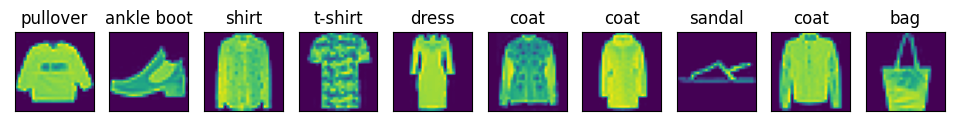

In [10]:
X,y=mnist_train[0:10]
show_fashion_mnist(X,get_fashion_mnist_labels(y))

In [11]:
batch_size=256 #批量大小
transformer = gdata.vision.transforms.ToTensor()
if sys.platform.startswith('win'):
    num_workers=0
else:
    num_workers=4
train_iter = gdata.DataLoader(mnist_train.transform_first(transformer), batch_size, shuffle=True,num_workers=num_workers)
test_iter = gdata.DataLoader(mnist_test.transform_first(transformer), batch_size, shuffle=False,num_workers=num_workers)

In [12]:
start=time.time()
for X, y in train_iter:
    continue
'%.2f sec' % (time.time() - start)

'3.40 sec'

softmax回归的从零实现

In [4]:
%matplotlib inline
import d2lzh as d2l
from mxnet import autograd, nd

In [5]:
# 获取数据
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [7]:
# 初始化模型参数
num_inputs = 784 # 输入个数 28*28
num_outputs = 10 # 10个类别

W = nd.random.normal(scale=0.01, shape=(num_inputs, num_outputs))
b = nd.zeros(num_outputs)

In [8]:
W.attach_grad()
b.attach_grad()

In [10]:
# 实现softmax运算
X=nd.array([[1,2,3],[4,5,6]])
X.sum(axis=0,keepdims=True),X.sum(axis=1,keepdims=True)

(
 [[5. 7. 9.]]
 <NDArray 1x3 @cpu(0)>,
 
 [[ 6.]
  [15.]]
 <NDArray 2x1 @cpu(0)>)

In [11]:
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(axis=1, keepdims=True)
    return X_exp / partition

In [13]:
X = nd.random.normal(shape=(2, 5))
X_prob = softmax(X)
X_prob, X_prob.sum(axis=1)

(
 [[0.09168093 0.21373768 0.5401294  0.03047529 0.12397669]
  [0.22366178 0.14223298 0.31009105 0.12796557 0.19604863]]
 <NDArray 2x5 @cpu(0)>,
 
 [1. 1.]
 <NDArray 2 @cpu(0)>)

In [14]:
# 定义模型
def net(X):
    return softmax(nd.dot(X.reshape((-1, num_inputs)), W) + b)

In [15]:
# 定义损失函数
y_hat=nd.array([[0.1,0.3,0.6],[0.3,0.2,0.5]])
y=nd.array([0,2])
nd.pick(y_hat,y)


[0.1 0.5]
<NDArray 2 @cpu(0)>

In [16]:
def cross_entropy(y_hat, y):
    return -nd.pick(y_hat, y).log()

In [ ]:
# def cross_entropy(y_hat, y, eps=1e-12):
#     # 裁剪概率值，避免 log(0) 的情况
#     y_hat = nd.clip(y_hat, eps, 1.0 - eps)
#     # 计算负对数似然
#     loss = -nd.pick(nd.log(y_hat), y)
#     # 返回批量平均损失
#     return loss.mean()

In [17]:
# 计算分类准确率
def accuracy(y_hat, y):
    return (y_hat.argmax(axis=1) == y.astype('float32')).mean().asscalar()

In [18]:
accuracy(y_hat, y)

0.5

In [19]:
# 计算在指定数据集上模型的精度
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        y = y.astype('float32')
        acc_sum += (net(X).argmax(axis=1) == y).sum().asscalar()
        n += y.size
    return acc_sum / n
evaluate_accuracy(test_iter, net)

0.1141

In [20]:
# 训练模型
num_epochs, lr = 5, 0.1

def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params=None, lr=None, trainer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter: # 小批量数据
            with autograd.record():
                y_hat = net(X)
                l = loss(y_hat, y).sum()
            l.backward()
            if trainer is None:
                d2l.sgd(params, lr, batch_size)
            else:
                trainer.step(batch_size)
            y=y.astype('float32')
            train_l_sum += l.asscalar()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().asscalar()
            n += y.size
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [W, b], lr)

epoch 1, loss 0.7875, train acc 0.746, test acc 0.804
epoch 2, loss 0.5727, train acc 0.813, test acc 0.823
epoch 3, loss 0.5290, train acc 0.824, test acc 0.832
epoch 4, loss 0.5060, train acc 0.829, test acc 0.834
epoch 5, loss 0.4892, train acc 0.834, test acc 0.838


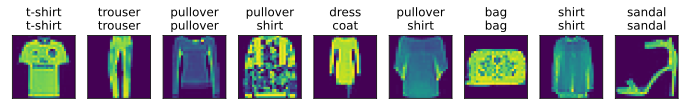

In [23]:
for X, y in test_iter:
    break
true_labels = get_fashion_mnist_labels(y.asnumpy())
pred_labels = get_fashion_mnist_labels(net(X).argmax(axis=1).asnumpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]
d2l.show_fashion_mnist(X[0:9], titles[0:9])

softmax回归的简洁实现

In [24]:
%matplotlib inline
import d2lzh as d2l
from mxnet import gluon, init, nd
from mxnet.gluon import nn

In [25]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [26]:
net=nn.Sequential() # 定义模型
net.add(nn.Dense(10)) # 添加一个全连接层
net.initialize(init.Normal(sigma=0.01))

In [27]:
loss=gluon.loss.SoftmaxCrossEntropyLoss()

In [28]:
trainer=gluon.Trainer(net.collect_params(),'sgd',{'learning_rate':0.1}) 
# net.collect_params()返回模型中的所有参数,sgd表示优化器，{'learning_rate':0.1}表示学习率

In [29]:
num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer)

epoch 1, loss 0.7887, train acc 0.747, test acc 0.798
epoch 2, loss 0.5740, train acc 0.810, test acc 0.823
epoch 3, loss 0.5301, train acc 0.823, test acc 0.828
epoch 4, loss 0.5048, train acc 0.831, test acc 0.838
epoch 5, loss 0.4899, train acc 0.834, test acc 0.839


尝试调一调超参数，如批量大小、学习率、迭代周期数等，看看是否能提高模型的精度。

(1) 调整批量大小
批量大小对训练速度和模型性能有重要影响。我们可以尝试以下值：

batch_size = 64

batch_size = 128

batch_size = 256（初始值）

batch_size = 512

调整建议：

较小的批量大小（如 64）可以提高模型的泛化能力，但训练速度较慢。

较大的批量大小（如 512）可以加快训练速度，但可能需要调整学习率。

(2) 调整学习率
学习率是控制模型参数更新步长的关键超参数。我们可以尝试以下值：

learning_rate = 0.01

learning_rate = 0.05

learning_rate = 0.1（初始值）

learning_rate = 0.2

调整建议：

如果学习率过大，训练损失可能会震荡或不收敛。

如果学习率过小，训练速度会变慢。

批量大小增加时，学习率也可以适当增加（通常按线性比例调整）。

(3) 调整迭代周期
迭代周期决定了模型遍历数据的次数。我们可以尝试以下值：

num_epochs = 5（初始值）

num_epochs = 10

num_epochs = 20

调整建议：

如果验证集损失持续下降，可以增加 epoch。

如果验证集损失开始上升，可能出现过拟合，可以提前停止训练。

In [30]:
%matplotlib inline
import d2lzh as d2l
from mxnet import gluon, init, nd
from mxnet.gluon import nn

# 调整后的超参数
batch_size = 128  # 批量大小
learning_rate = 0.05  # 学习率
num_epochs = 10  # 迭代周期

# 加载数据
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# 定义模型
net = nn.Sequential()
net.add(nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

# 定义损失函数
loss = gluon.loss.SoftmaxCrossEntropyLoss()

# 定义 Trainer
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': learning_rate})

# 训练模型
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer)

epoch 1, loss 0.7814, train acc 0.754, test acc 0.810
epoch 2, loss 0.5710, train acc 0.812, test acc 0.821
epoch 3, loss 0.5270, train acc 0.825, test acc 0.833
epoch 4, loss 0.5036, train acc 0.831, test acc 0.836
epoch 5, loss 0.4877, train acc 0.835, test acc 0.839
epoch 6, loss 0.4764, train acc 0.838, test acc 0.841
epoch 7, loss 0.4678, train acc 0.842, test acc 0.847
epoch 8, loss 0.4605, train acc 0.843, test acc 0.845
epoch 9, loss 0.4550, train acc 0.845, test acc 0.846
epoch 10, loss 0.4505, train acc 0.847, test acc 0.850
